In [4]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pylab as plt
import numpy as np

In [36]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,21)
data =pdr.get_data_yahoo("TQQQ", start,end)

In [144]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-02-11,0.869792,0.811146,0.813750,0.865104,1728000.0,0.862942
2010-02-12,0.876146,0.836667,0.841563,0.868646,4300800.0,0.866475
2010-02-16,0.904375,0.875104,0.889063,0.902292,4809600.0,0.900037
2010-02-17,0.917813,0.900625,0.914375,0.917604,9590400.0,0.915311
2010-02-18,0.940521,0.911146,0.916667,0.935000,19430400.0,0.932663
...,...,...,...,...,...,...
2021-12-14,157.559998,149.830002,154.119995,155.500000,57733400.0,155.500000
2021-12-15,166.270004,150.029999,154.960007,165.789993,67265300.0,165.789993
2021-12-16,167.619995,150.949997,167.009995,153.139999,74055000.0,153.139999


In [38]:
list_adjClose = data["Adj Close"]
Drawdown = (np.maximum.accumulate(list_adjClose) - list_adjClose) /np.maximum.accumulate(list_adjClose)
print(Drawdown)

Date
2010-02-11    0.000000
2010-02-12    0.000000
2010-02-16    0.000000
2010-02-17    0.000000
2010-02-18    0.000000
                ...   
2021-12-14    0.122163
2021-12-15    0.064074
2021-12-16    0.135486
2021-12-17    0.148696
2021-12-20    0.174156
Name: Adj Close, Length: 2986, dtype: float64


In [130]:
l = np.argmax((np.maximum.accumulate(list_adjClose) - list_adjClose) /np.maximum.accumulate(list_adjClose))
k = np.argmax(list_adjClose[:l])

In [137]:
k

2521

In [138]:
l

2543

In [139]:
list_adjClose[k]

59.029998779296875

In [140]:
list_adjClose[l]

17.7549991607666

In [131]:
mdd = (list_adjClose[k] - list_adjClose[l])/(list_adjClose[k])

In [132]:
print(mdd)

0.6992207432165207


In [123]:
Roll_Max = data['Adj Close'].cummax()
Daily_Drawdown = data['Adj Close']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()

In [148]:
list_adjClose[np.argmin(Daily_Drawdown)]

17.7549991607666

In [127]:
np.argmin(Max_Daily_Drawdown)

2543

In [146]:
list_adjClose[np.argmin(Max_Daily_Drawdown)]

17.7549991607666

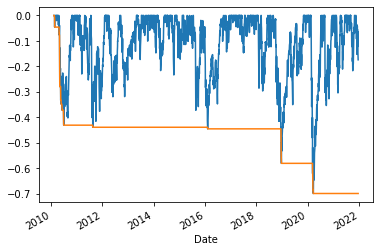

In [133]:
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
plt.show()

In [152]:
mdd = Max_Daily_Drawdown.min()

In [153]:
mdd

-0.6992207432165207